# Tarefa 01

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os monitores
- Divirta-se :)

#### 1. Baixando dados de ativos
    1. Baixe os dados de três ativos da sua escolha do Yahoo Finance, correspondente a um período de pelo menos 2 anos até a data mais recente.
    2. Salve esses dados para que você possa utilizá-los na próxima tarefa.

In [43]:
from pandas_datareader import data as web
import yfinance as yf
import plotly.express as px
from plotly import graph_objects
import pandas as pd
import numpy as np

In [44]:
# Define the stock symbol and date range
symbol = "BBAS3.SA"  # For Apple stock, for example
start_date = "2023-01-01"
end_date = "2023-10-31"

# Fetch stock data directly using yfinance
data = yf.download(symbol, start=start_date, end=end_date)

# Display the fetched data
data

[*********************100%***********************]  1 of 1 completed


Price           Close       High        Low       Open    Volume
Ticker       BBAS3.SA   BBAS3.SA   BBAS3.SA   BBAS3.SA  BBAS3.SA
Date                                                            
2023-01-02  14.519232  14.938309  14.362080  14.938309  23557000
2023-01-03  14.248581  14.580350  14.152542  14.519234  21547400
2023-01-04  14.431925  14.519231  14.213656  14.331521  19519000
2023-01-05  15.091093  15.165305  14.440653  14.532326  33937600
2023-01-06  15.300636  15.396675  15.034348  15.126022  29504600
...               ...        ...        ...        ...       ...
2023-10-24  22.480556  22.847286  22.329279  22.691426  17053000
2023-10-25  22.485138  22.755601  22.411792  22.498892  12625200
2023-10-26  22.952721  23.012315  22.443882  22.526397  19577600
2023-10-27  22.370539  22.948140  22.246767  22.874794  20337800
2023-10-30  22.214676  22.563070  22.104658  22.462219  18010200

[208 rows x 5 columns]

In [45]:
symbol = 'BBAS3.SA','ITUB3.SA', 'PETR4.SA', 'ABEV3.SA', 'VALE3.SA'  # For Apple stock, for example
start_date = "2016-01-01"

data = yf.download(symbol, start=start_date)
data.head()

[*********************100%***********************]  5 of 5 completed


Price           Close                                               High  \
Ticker       ABEV3.SA  BBAS3.SA  ITUB3.SA  PETR4.SA  VALE3.SA   ABEV3.SA   
Date                                                                       
2016-01-04  12.167259  4.229651  9.225195  2.044447  7.248121  12.534893   
2016-01-05  12.358146  4.244503  9.420879  1.987904  7.151023  12.386426   
2016-01-06  12.237957  4.244503  9.364965  1.904579  6.625549  12.358145   
2016-01-07  11.912744  4.143512  9.253143  1.862917  6.231442  12.245027   
2016-01-08  12.068280  4.143512  9.396918  1.865892  6.020110  12.160189   

Price                                               ...       Open            \
Ticker      BBAS3.SA  ITUB3.SA  PETR4.SA  VALE3.SA  ...   ABEV3.SA  BBAS3.SA   
Date                                                ...                        
2016-01-04  4.327670  9.732380  2.092061  7.413760  ...  12.534893  4.289057   
2016-01-05  4.327670  9.440847  2.083133  7.333796  ...  12.195539  4.280146   
2016-01-06  4.303908  9.492760  1.946242  6.916845  ...  12.273307  4.196978   
2016-01-07  4.226679  9.325028  1.913507  6.494180  ...  12.138979  4.188066   
2016-01-08  4.265293  9.396918  1.919459  6.425639  ...  11.969302  4.214798   

Price                                       Volume                     \
Ticker      ITUB3.SA  PETR4.SA  VALE3.SA  ABEV3.SA  BBAS3.SA ITUB3.SA   
Date                                                                    
2016-01-04  9.732380  1.955170  7.133888  13206900  12181000   278520   
2016-01-05  9.364969  2.059326  7.236698  10774200  11209000    99825   
2016-01-06  9.380940  1.943266  6.899710   7739100  11730000   181995   
2016-01-07  9.249149  1.842086  6.431351  15316400  12981400   221925   
2016-01-08  9.341008  1.898627  6.322829  10684000   9385000   122100   

Price                          
Ticker      PETR4.SA VALE3.SA  
Date                           
2016-01-04  45962100  4587900  
2016-01-05  29446700  2693500  
2016-01-06  67507200  6758900  
2016-01-07  57387900  6450400  
2016-01-08  52100300  4429400  

[5 rows x 25 columns]

In [56]:
data.to_csv('dadosLimpos.csv', sep=',')

In [58]:
data.shape

(2279, 25)

#### 2. Observando a volatilidade dentro do dia
1. Calcule a amplitude de variação do valor do ativo dentro do dia. Essa amplitude você pode calcular com um comando simples de adicionar uma coluna no Pandas: (valor máximo - valor mínimo).
2. Monte um gráfico de linha mostrando a variação dessa amplitude ao longo do período coletado, por ativo.
3. Veja se consegue identificar que ativo apresentou maior volatilidade.

In [59]:
amplitudade = data['High'] - data['Low']
amplitudade

Ticker      ABEV3.SA  BBAS3.SA  ITUB3.SA  PETR4.SA  VALE3.SA
Date                                                        
2016-01-04  0.367634  0.098019  0.507186  0.142843  0.285584
2016-01-05  0.289865  0.083167  0.187699  0.113084  0.245602
2016-01-06  0.197956  0.139602  0.307507  0.041663  0.297007
2016-01-07  0.332284  0.086138  0.163737  0.104157  0.279872
2016-01-08  0.190887  0.163364  0.195686  0.095229  0.405529
...              ...       ...       ...       ...       ...
2025-02-18  0.130000  0.629999  0.580000  0.730000  0.460003
2025-02-19  0.110000  0.630001  0.320002  0.790001  1.009998
2025-02-20  0.180000  0.519999  0.360001  0.259998  1.680000
2025-02-21  0.160000  0.410000  0.230000  0.360001  0.599998
2025-02-24  0.160000  0.410000  0.240000  0.489998  1.080002

[2279 rows x 5 columns]

In [72]:
amplitude = data
amplitude.head()
f'amplitude do {data}'
print(fechamento)

#amplitudade_vertical = yf['Adj Close'].stack().reset_index()
#amplitudade_vertical.columns = ['data', 'ativo', 'valor']

#amplitudade_vertical.head()

Price           Close                                                   High  \
Ticker       ABEV3.SA   BBAS3.SA   ITUB3.SA   PETR4.SA   VALE3.SA   ABEV3.SA   
Date                                                                           
2016-01-04  12.167259   4.229651   9.225187   2.044447   7.248124  12.534893   
2016-01-05  12.358147   4.244504   9.420874   1.987905   7.151022  12.386427   
2016-01-06  12.237960   4.244504   9.364966   1.904579   6.625547  12.358148   
2016-01-07  11.912745   4.143514   9.253143   1.862917   6.231442  12.245028   
2016-01-08  12.068279   4.143514   9.396917   1.865893   6.020110  12.160188   
...               ...        ...        ...        ...        ...        ...   
2025-02-18  11.090000  29.450001  29.500000  38.360001  55.740002  11.170000   
2025-02-19  10.970000  28.860001  29.230000  38.439999  55.689999  11.040000   
2025-02-20  11.040000  28.000000  29.070000  38.500000  57.740002  11.080000   
2025-02-21  11.120000  27.980000  29.100

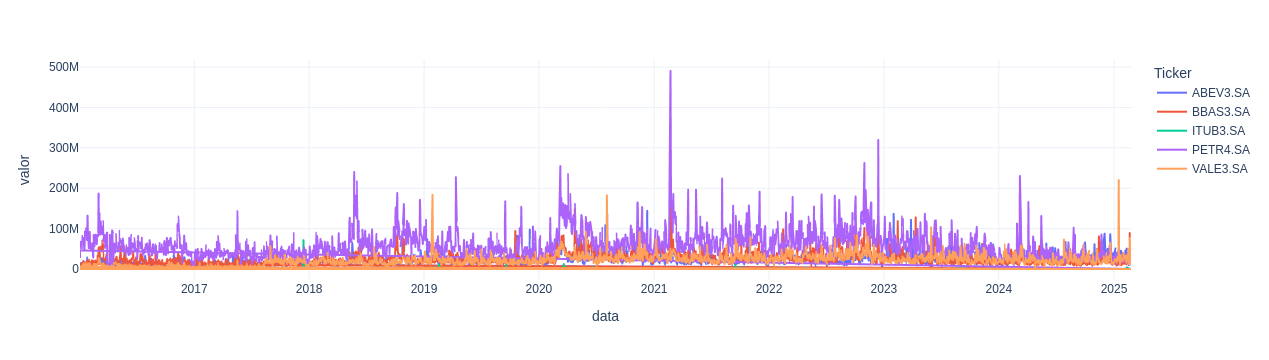

In [75]:
# Transformando o DataFrame em formato vertical
fechamento_vertical = amplitude.melt(ignore_index=False).reset_index()

# Renomeando as colunas para facilitar o entendimento
fechamento_vertical.columns = ['data', 'Price', 'Ticker', 'valor']

# Agora você pode plotar os dados
fig = px.line(fechamento_vertical, x="data", y="valor", color='Ticker', template='plotly_white')
fig.show()